# K Ravi Teja

# Task-3

# Develop A Neural Network That Can Read Handwriting

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
# For manipulating the Image(represented in the form of array)
import numpy as np

#for building a model
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

# MNIST dataset available in
from tensorflow.keras.datasets import mnist

# For visualizing images
import matplotlib.pyplot as plt

# To Load DataSet

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset. It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9. The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

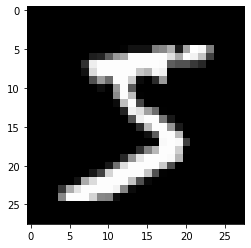

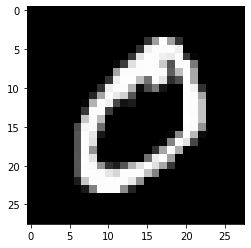

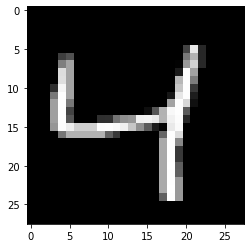

In [5]:
# plot first 3 images
test=x_train[100]
for i in range(3):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

# Prepare Data

In [6]:
 # Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28,28,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) # Dropout, one form of regularization
model.add (Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add (MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add( Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [9]:
#Batch Size of 128
batch_size = 128

#Total Epochs i am considering 5
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 26s 60ms/step - loss: 0.4178 - accuracy: 0.8695 - val_loss: 0.0915 - val_accuracy: 0.9770
Epoch 2/5
422/422 [==============================] - 25s 59ms/step - loss: 0.1317 - accuracy: 0.9593 - val_loss: 0.0635 - val_accuracy: 0.9833
Epoch 3/5
422/422 [==============================] - 25s 59ms/step - loss: 0.1028 - accuracy: 0.9684 - val_loss: 0.0537 - val_accuracy: 0.9847
Epoch 4/5
422/422 [==============================] - 25s 60ms/step - loss: 0.0863 - accuracy: 0.9732 - val_loss: 0.0505 - val_accuracy: 0.9855
Epoch 5/5
422/422 [==============================] - 24s 57ms/step - loss: 0.0748 - accuracy: 0.9769 - val_loss: 0.0428 - val_accuracy: 0.9882


# Modeling Testing

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.040723767131567
Test accuracy: 0.9872000217437744


# Testing Model with User Input

In [11]:
# Package used for loading images
from keras.preprocessing.image import load_img
# Used to convert image to array
from keras.preprocessing.image import img_to_array

def load_image(imagePath):
    # load the image
    img = load_img(imagePath, grayscale=True, target_size=(28, 28))
    # convert to array
    plt.imshow(img,cmap="gray")
    plt.title("The Actual Image")
    img = img_to_array(img)
    # reshape into a single sample 
    img = img.reshape(1, 28, 28, 1)
    return img

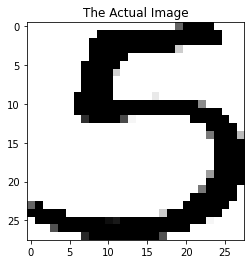

In [14]:
img = load_image('test.png')
y_pred = model.predict(img)
y_pred = np.round(y_pred).astype(int)

Predicted Image is  0


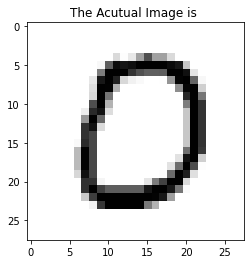

In [15]:
image_index = 10
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("The Acutual Image is ")
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("Predicted Image is ",pred.argmax())